# Pleque  for COMPASS-U Fiesta files
Pleque = PLasma EQUilibrium Enjoyment module

Before you run this notebook make sure you have loaded pleque module

```
module load pleque
```

Currrntly available equilibria are stored in 
```
/compass/Shared/Common/COMPASS-UPGRADE/RP1\ Design/Equilibria/v3.1
```

** Importants notes: **
* Only diverted plasmas are supported at the moment.
* Please consider that the module is in status "work in progress" and some things may change in the future.
* Latest version of a master branch can be found at https://repo.tok.ipp.cas.cz/kripner/pleque, please add an issue there if you find a bug or you would appreciate some enhancement of the module.  


In [1]:
ls /compass/Shared/Common/COMPASS-UPGRADE/RP1\ Design/Equilibria/v3.1

baseline_currents.txt
baseline_eqdsk
baseline.fig
baseline_forces.txt
baseline.mat
baseline.png
baseline_tension.txt
baseline_upward_currents.txt
baseline_upward_eqdsk
baseline_upward_forces.txt
baseline_upward.mat
baseline_upward.png
baseline_upward_tension.txt
DoubleNull_currents.txt
DoubleNull_eqdsk
DoubleNull_forces.txt
DoubleNull.mat
DoubleNull.png
extreme_scenario_high_delta_ai_currents.txt
extreme_scenario_high_delta_ai_eqdsk
extreme_scenario_high_delta_ai_forces.txt
extreme_scenario_high_delta_ai.mat
extreme_scenario_high_delta_ai.png
extreme_scenario_high_delta_ai_tension.txt
extreme_scenario_high_delta_upw_ai_currents.txt
extreme_scenario_high_delta_upw_ai_eqdsk
extreme_scenario_high_delta_upw_ai_forces.txt
extreme_scenario_high_delta_upw_ai.mat
extreme_scenario_high_delta_upw_ai.png
extreme_scenario_high_delta_upw_ai_tension.txt
extreme_scenario_small_ai_currents.txt
extreme_scenario_small_ai_eqdsk
extreme_scenario_small_ai_forces.txt
extreme_scenario_small_ai.mat
extreme_sc

#### Important imports:

In [2]:
%pylab notebook
from pleque.io import compass
from pleque.utils import plotting

Populating the interactive namespace from numpy and matplotlib


---------------------------------
Equilibrium module initialization
---------------------------------
--- Generate 2D spline ---
--- Looking for extremes ---


<IPython.core.display.Javascript object>


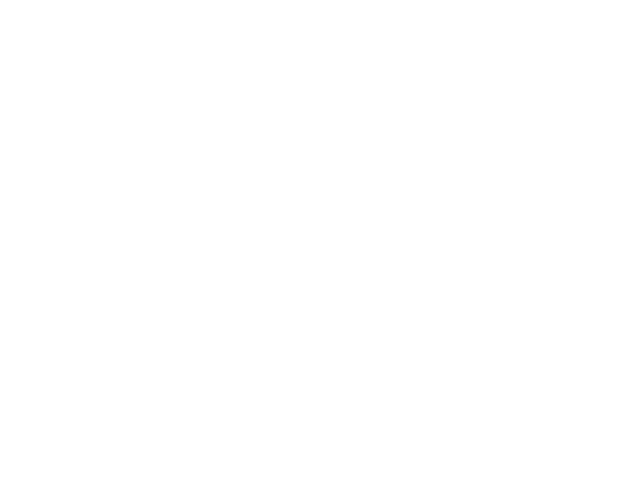

>>> lower x-point configuration found
--- Generate 1D splines ---
--- Mapping midplane to psi_n ---
--- Mapping pressure and f func to psi_n ---


In [3]:
fiesta_file_home = '/compass/Shared/Common/COMPASS-UPGRADE/RP1 Design/Equilibria/v3.1/'
avail_equilibria = ('baseline_eqdsk', 'baseline_upward_eqdsk', 'DoubleNull_eqdsk', 'scenario_1_baseline_upward_eqdsk')
#eq = compass.read_fiesta_equilibrium(fiesta_file_home+avail_equilibria[0])
from test.testing_utils import load_testing_equilibrium
eq = load_testing_equilibrium()

## Let's plot some basic info about equilibrium:

<IPython.core.display.Javascript object>


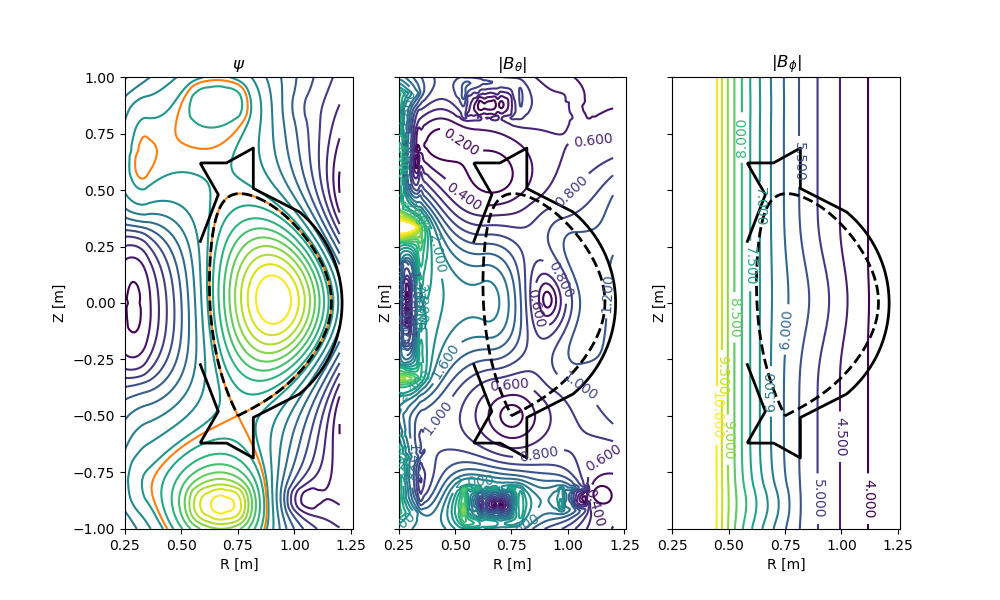

In [4]:
# generate simple grid for printing (instance of Coordinates class) 
grid = eq.grid((200,300),dim='size')

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,6))

# Fast decoration of the plot
def decorate_ax(ax: plt.Axes):
    ax.plot(eq.lcfs.R, eq.lcfs.Z, color='k', ls='--', lw=2)
    ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-', lw=2)
    ax.set_xlabel('R [m]')
    ax.set_ylabel('Z [m]')
    ax.set_aspect('equal')

# lets' plot psi
ax = axs[0]
ax.set_title(r'$\psi$')
# psi is one of the coordinates so it can be evaluate as grid.psi, 
# it is equivalent to eq.psi(grid)
ax.contour(grid.R, grid.Z, grid.psi, 20)
# plot lcfs and first wall (limiter)
ax.plot(eq.lcfs.R, eq.lcfs.Z, color='k', ls='--', lw=2)
ax.contour(grid.R, grid.Z, grid.psi, eq.lcfs.psi[0], colors='C1')
ax.plot(eq.first_wall.R, eq.first_wall.Z, 'k-', lw=2)


# some decoration: 
ax.set_xlabel('R [m]')
ax.set_ylabel('Z [m]')
ax.set_aspect('equal')

# Now poloidal field: 
ax = axs[1]
ax.set_title(r'$|B_\theta|$')
# Magnetic field is not coordinate, so it must be called from Equilibrium class:
cs = ax.contour(grid.R, grid.Z, eq.B_pol(grid), np.linspace(0, 4, 21))
plt.clabel(cs, inline=1)
decorate_ax(ax)

ax = axs[2]
ax.set_title(r'$|B_\phi|$')
cs = ax.contour(grid.R, grid.Z, eq.B_tor(grid), np.linspace(2, 10, 17))
plt.clabel(cs, inline=1)
decorate_ax(ax)



## Now some equilibrium midplane profiles:
As a first step we have to generate some midplane coordinates. 
We have multiple options for this. Let's choose the fastest way how to generete them. 
More options to generate coordinates will be shown later in the notebook. 


<IPython.core.display.Javascript object>


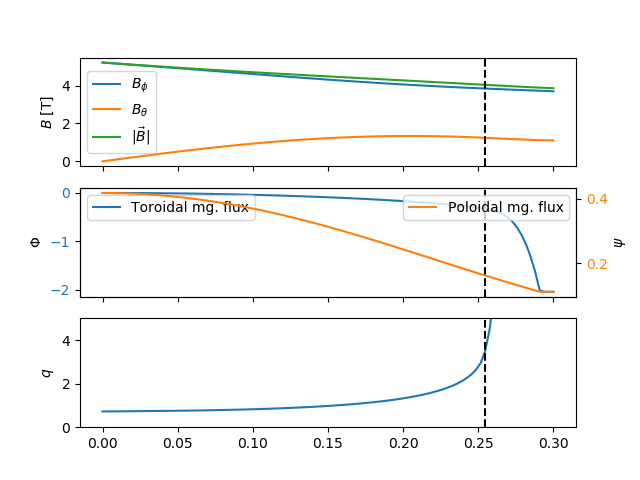

(0, 5)

In [5]:
# we will generate coordinates in polar system with it's center on the magnetic axis:
# (!) there is lower case r, not capitalized R which denotes to cylindrical coordinates

# number of points
N = 100
# module automaticaly identify the type of the input: 
midplane = eq.coordinates(r=np.linspace(0, 0.3, N), theta=np.zeros(N))
# this is not the simpliest way... It will be more handy in the near future
r_sep = eq.lcfs.r[np.argmin(np.abs(eq.lcfs.theta))]


fig, axs = plt.subplots(3, 1, sharex=True)


# First profiles of magnetic fields on midplane: 
ax = axs[0]
# Profile of toroidal field: 
ax.plot(midplane.r, eq.B_tor(midplane), label=r'$B_\phi$')
# Profile of poloidal field: 
ax.plot(midplane.r, eq.B_pol(midplane), label=r'$B_\theta$')
# total
ax.plot(midplane.r, eq.B_abs(midplane), label=r'$|\vec B|$')
ax.axvline(r_sep, color='k', ls='--')
ax.set_ylabel(r'$B$ [T]')
ax.legend()


# Field coordinates (poloidal and toroidal flux)
ax = axs[1]
ax2 = ax.twinx()
# ax.plot(midplane.r, eq.tor_flux(r=midplane.r))
ax.plot(midplane.r, eq.tor_flux(midplane), 'C0', label='Toroidal mg. flux')
ax.axvline(r_sep, color='k', ls='--')
ax.tick_params(labelcolor='C0')
ax.set_ylabel(r'$\Phi$')
ax.legend()

ax2.plot(midplane.r, midplane.psi, 'C1', label='Poloidal mg. flux')
ax2.tick_params(labelcolor='C1')
ax2.set_ylabel(r'$\psi$')

ax2.legend()

# q-profile
ax = axs[2]
ax.plot(midplane.r, eq.q(midplane), label='q')
ax.set_ylabel(r'$q$')
ax.axvline(r_sep, color='k', ls='--')
ax.set_ylim([0, 5])


# ax = gca()
# ax.set_title(r'$\psi$')
# psi is one of the coordinates so it can be evaluate as grid.psi, 
# it is equivalent to eq.psi(grid)
# ax.contour(grid.R, grid.Z, grid.psi, 20)
# decorate_ax(ax)


## Spline interpolation of fitted data and mapping to various coordinates

<IPython.core.display.Javascript object>


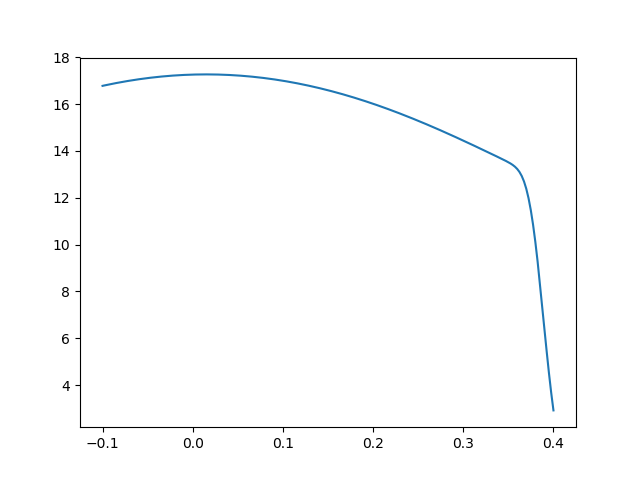

<IPython.core.display.Javascript object>


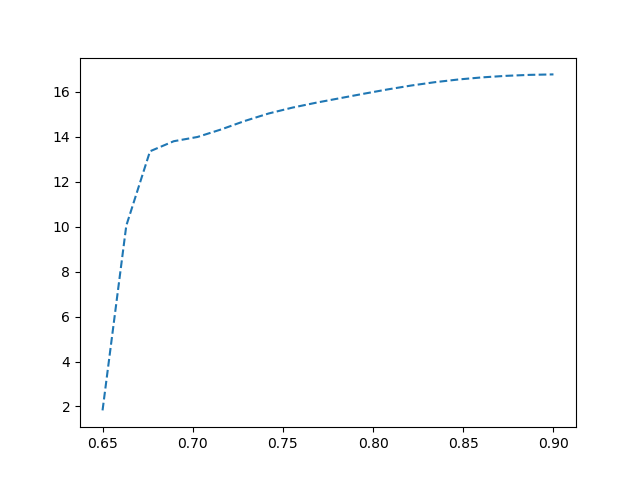

In [6]:
from scipy.special import erf

N = 200

chord1 = eq.coordinates(R=0.9*np.ones(N), Z=np.linspace(0.4, -0.1, N))
chord2 = eq.coordinates(R=np.linspace(0.65, 0.9, 20), Z=-0.1*np.ones(20))


# let's define some testing profile function: 
prof_func = lambda x, k1, xsep: k1/4 * (1 + erf((x-xsep)*20))*np.log((x+1)*5)
chord_prof = prof_func(1 - chord1.psi_n, 15, 0.1)

# todo here
plt.figure()
plt.plot(chord1.Z, chord_prof)
eq.fluxfuncs.add_flux_func('test_prof', chord_prof, chord1, spline_smooth=1)

plt.figure()
plt.plot(chord2.R, eq.fluxfuncs.test_prof(chord2), '--')

